# Simple Linear Regression

Training instance     Diameter (in inches)     Price (in dollars)

1                     6                        7

2                     8                        9

3                     10                       13

4                     14                       17.5

5                     18                       18

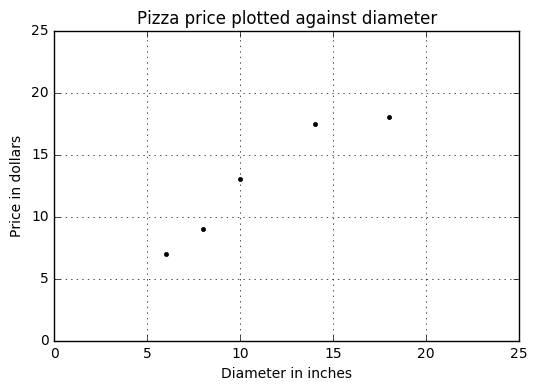

In [1]:
import matplotlib.pyplot as plt


X = [[6], [8], [10], [14],   [18]]
y = [[7], [9], [13], [17.5], [18]]
plt.figure()
plt.title('Pizza price plotted against diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.plot(X, y, 'k.')
plt.axis([0, 25, 0, 25])
plt.grid(True)
plt.show()

In [15]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Training data
X = np.array([[6], [8], [10], [14],   [18]])
y = np.array([[7], [9], [13], [17.5], [18]])

# Create and fit the model
model = LinearRegression()
model.fit(X, y)
print ('A 12" pizza should cost: $%.2f' % model.predict([12])[0])

A 12" pizza should cost: $13.68


/Users/AdamLiu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [16]:
# We can produce the best pizza-price predictor by minimizing the sum of the residuals. 
# That is, our model  fits if the values it predicts for the response variable are close
# to the observed values for all of the training examples.
# This measure of the model's  fitness is called:
# the residual sum of squares cost function.

print ('Residual sum of squares: %.2f' % np.mean((model.predict(X) - y) ** 2))

Residual sum of squares: 1.75


# Solving ordinary least squares for simple linear regression

***Variance*** is a measure of how far a set of values is spread out. If all of the numbers in the set are equal, the variance of the set is zero. A small variance indicates that the numbers are near the mean of the set, while a set containing numbers that are far from the mean and each other will have a large variance.

In [17]:
from __future__ import division
xbar = (6 + 8 + 10 + 14 + 18) / 5
variance = ((6 - xbar)**2 + (8 - xbar)**2 + (10 - xbar)**2 + (14 - xbar)**2 + (18 - xbar)**2) / 4
print (variance)

23.2


NumPy also provides the *var* method to calculate variance. The ddof keyword parameter can be used to set Bessel's correction to calculate the sample variance:

In [19]:
print (np.var([6, 8, 10, 14, 18], ddof=1))

23.2


***Covariance*** is a measure of how much two variables change together. If the value of the variables increase together, their covariance is positive. If one variable tends to increase while the other decreases, their covariance is negative.

In [21]:
# x: diameters
# y: prices

xbar = (6 + 8 + 10 + 14 + 18) / 5
ybar = (7 + 9 + 13 + 17.5 + 18) / 5

cov = ((6 - xbar) * (7 - ybar) + 
       (8 - xbar) * (9 - ybar) + 
       (10 - xbar) * (13 - ybar) + 
       (14 - xbar) * (17.5 - ybar) + 
       (18 - xbar) * (18 - ybar)) / 4

print (cov)
print (np.cov([6, 8, 10, 14, 18], [7, 9, 13, 17.5, 18])[0][1])

22.65
22.65


β = cov(x, y) / var(x)

In [22]:
beta = np.cov([6, 8, 10, 14, 18], [7, 9, 13, 17.5, 18])[0][1] / np.var([6, 8, 10, 14, 18], ddof=1)
beta

0.97629310344827602

***R-squared*** measures how well the observed values of the response variables are predicted by the model. More concretely, r-squared is the proportion of the variance in the response variable that is explained by the model.

***R-squared*** must be a positive number between zero and one.

In [23]:
X_test = [[8],  [9],   [11], [16], [12]]
y_test = [[11], [8.5], [15], [18], [11]]
model = LinearRegression()
model.fit(X, y)
print ('R-squared: %.4f' % model.score(X_test, y_test))

R-squared: 0.6620


# Multiple Linear Regression

Where simple linear regression uses a single explanatory variable with a single coef cient, multiple linear regression uses a coef cient for each of an arbitrary number of explanatory variables.

In [25]:
from numpy.linalg import inv
from numpy import dot, transpose

X = [[1, 6, 2], 
     [1, 8, 1], 
     [1, 10, 0], 
     [1, 14, 2], 
     [1, 18, 0]]

y = [[7], 
     [9], 
     [13], 
     [17.5], 
     [18]]

print (dot(inv(dot(transpose(X), X)), dot(transpose(X), y)))

[[ 1.1875    ]
 [ 1.01041667]
 [ 0.39583333]]


tbc...